In [15]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 8.2 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 11.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.2 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [75]:
import pandas as pd
import matplotlib.pyplot as plt

raw_df = pd.read_csv("merged_crops.csv")

In [76]:
df = raw_df.fillna(0)
df.iloc[:, 1:] = df.iloc[:, 1:].applymap(lambda x: 0 if isinstance(x, str) else x)


/var/folders/xj/3_cf3p513dxgf8tbpc4j_1j40000gn/T/ipykernel_19641/2402748262.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.iloc[:, 1:] = df.iloc[:, 1:].applymap(lambda x: 0 if isinstance(x, str) else x)


/var/folders/xj/3_cf3p513dxgf8tbpc4j_1j40000gn/T/ipykernel_19641/2135720637.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = [col if percentages[i] >= 5 else "" for i, col in enumerate(values.index)]


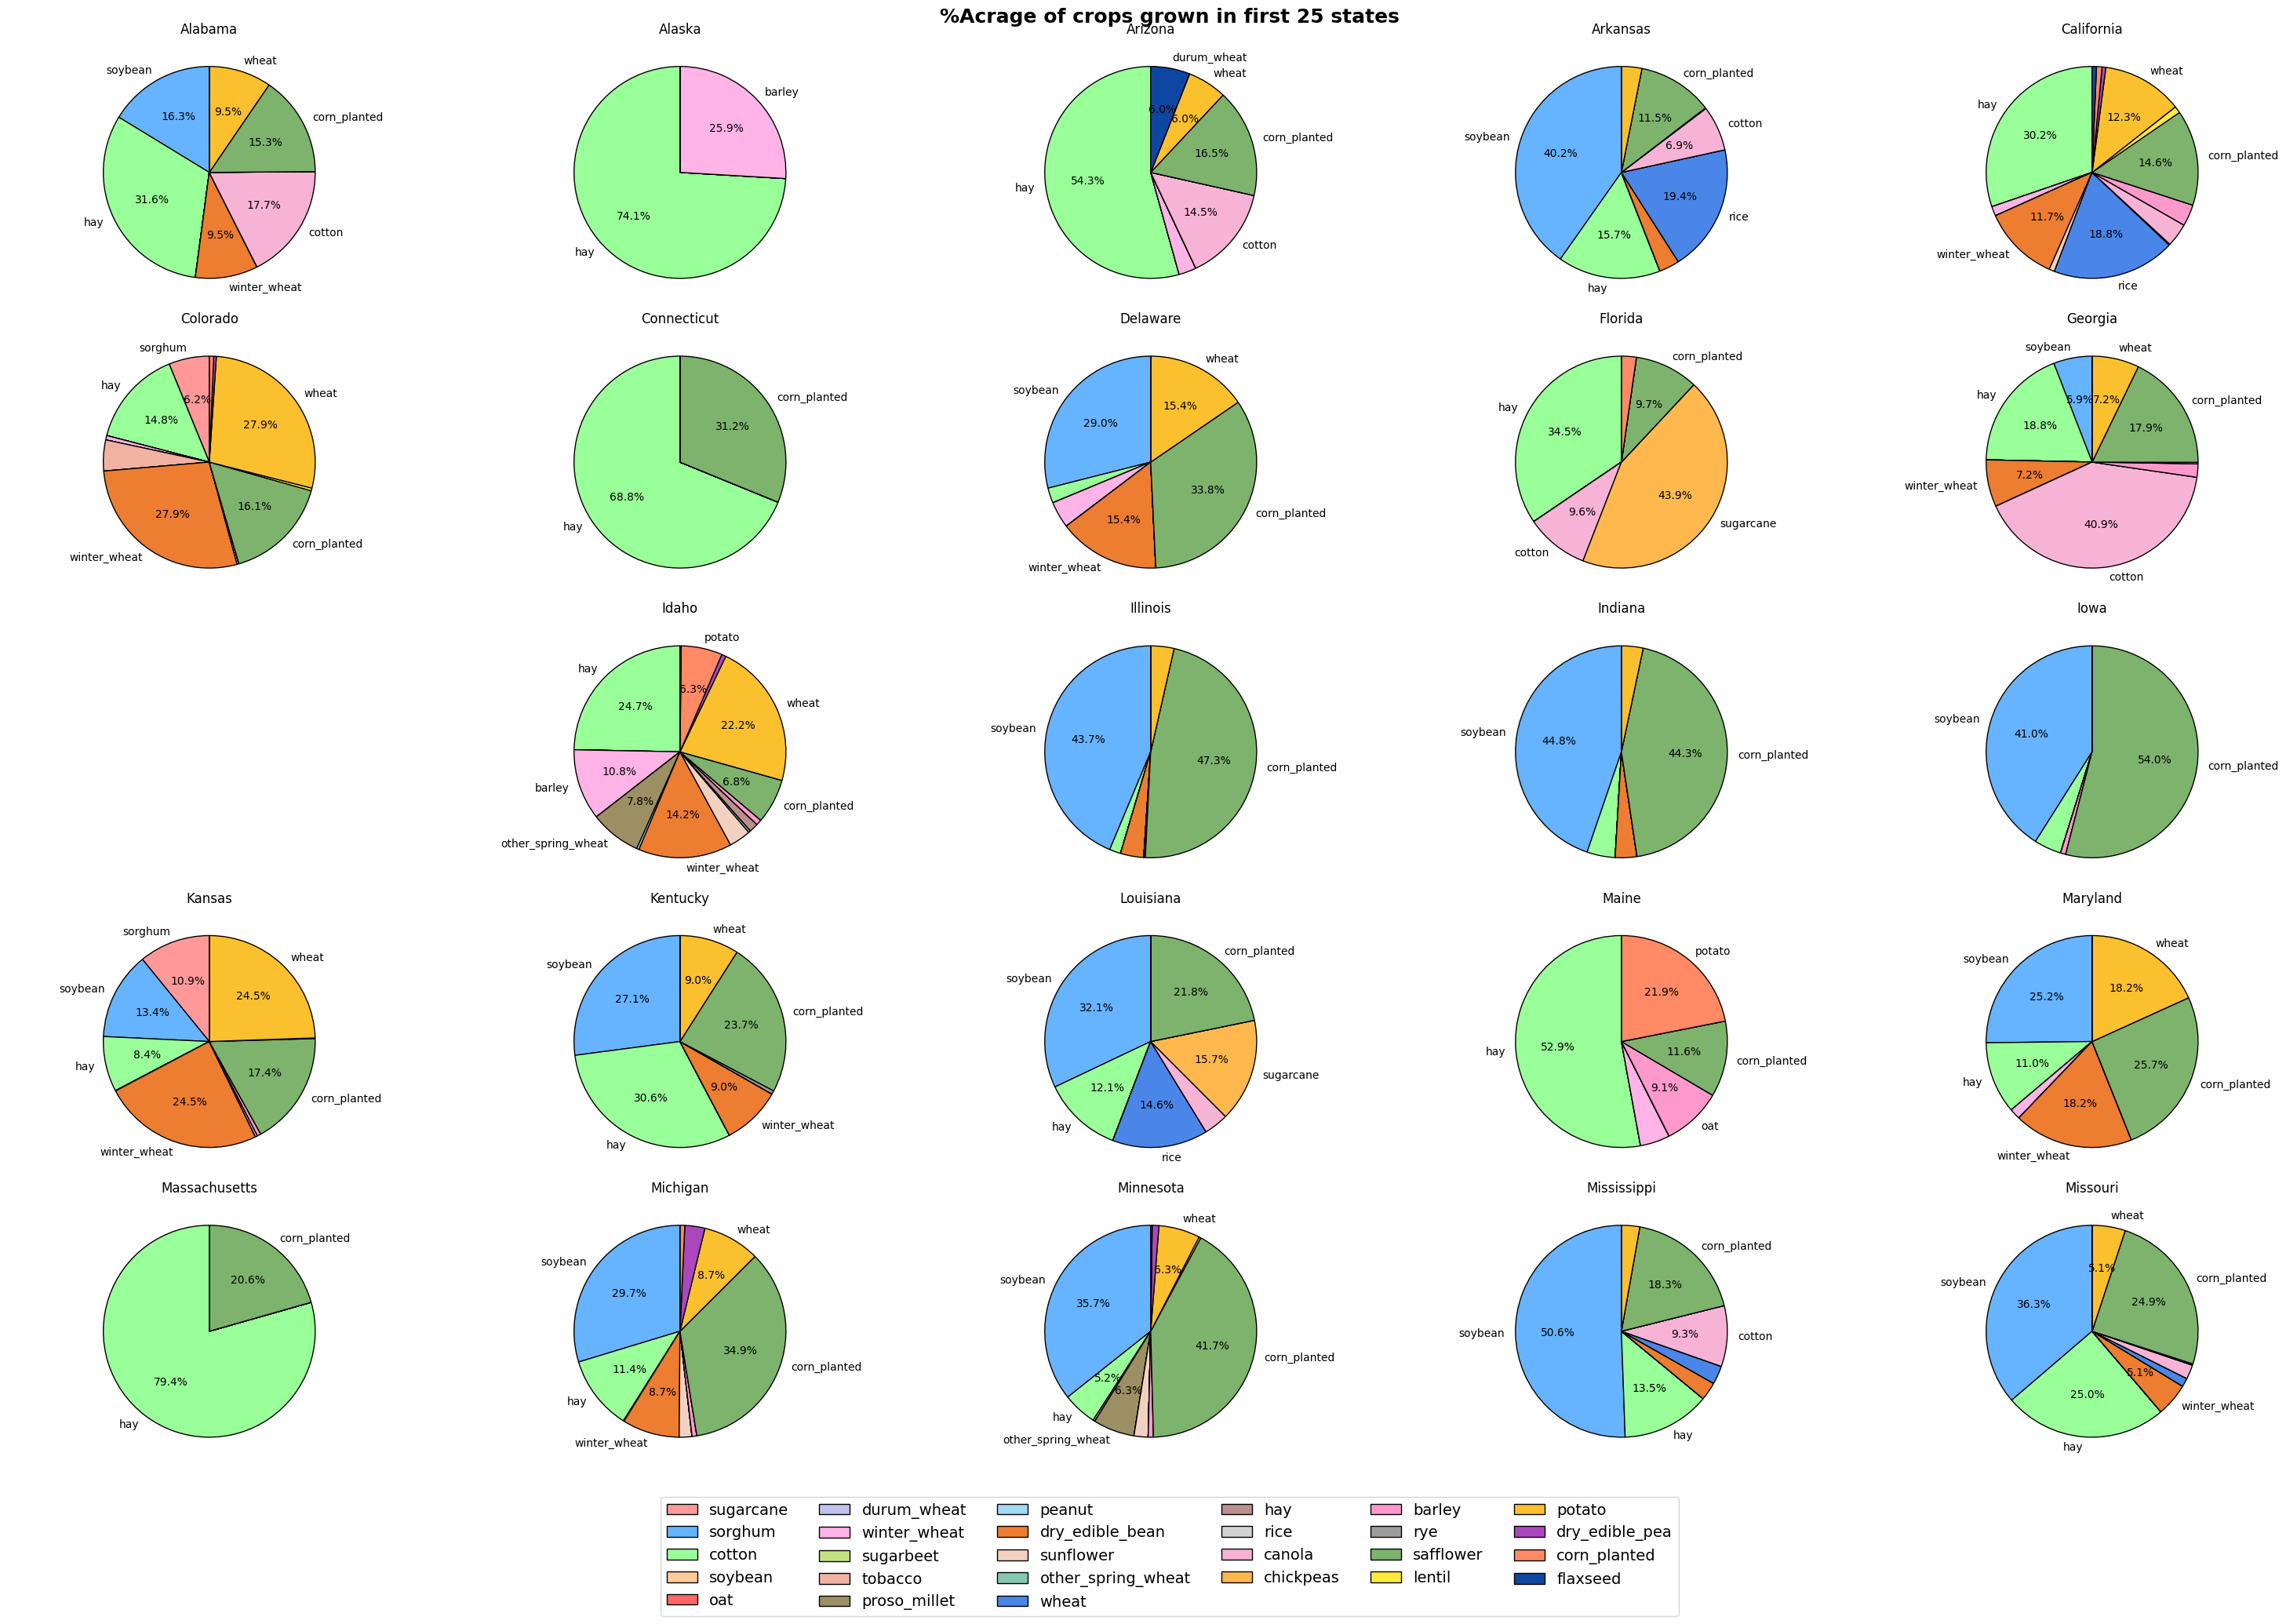

In [92]:
def autopct_format(pct):
    """Show percentage only if ≥ 5%"""
    return f"{pct:.1f}%" if pct >= 5 else ""

# Define a fixed color palette based on the column names
color_palette = {
    "sorghum": "#ff9999", "soybean": "#66b3ff", "hay": "#99ff99", "flaxseed": "#ffcc99",
    "canola": "#ff6666", "safflower": "#c2c2f0", "barley": "#ffb3e6", "peanut": "#c4e17f",
    "proso_millet": "#f1b2a1", "other_spring_wheat": "#9b8f63", "dry_edible_pea": "#a3d8f4", 
    "winter_wheat": "#ed7d31", "sugarbeet": "#f3d1c1", "lentil": "#84c8b2", "rice": "#4a86e8", 
    "chickpeas": "#bc8f8f", "rye": "#d3d3d3", "cotton": "#f7b3d5", "sugarcane": "#ffb84d", 
    "oat": "#ff99cc", "tobacco": "#9c9c9c", "corn_planted": "#7db36d", "sunflower": "#ffeb3b", 
    "wheat": "#fbc02d", "dry_edible_bean": "#ab47bc", "potato": "#ff8a65", "durum_wheat": "#0d47a1"
}

def plot_pie_charts(sub_df, fig_title):
    """ Function to plot a 5x5 grid of larger pie charts with a single legend """
    fig, axes = plt.subplots(5, 5, figsize=(30, 20))  # Increase figure size
    axes = axes.flatten()  # Flatten for easy iteration
    all_labels = set()

    for i, (index, row) in enumerate(sub_df.iterrows()):
        state_name = row["State"]
        values = row.iloc[1:]

        # Skip pie chart if all values are zero
        if values.sum() == 0:
            axes[i].axis("off")
            continue

        # Filter out values < 5% for labels
        percentages = values / values.sum() * 100
        labels = [col if percentages[i] >= 5 else "" for i, col in enumerate(values.index)]
        all_labels.update(values.index)  # Collect all labels for the final legend

        # Get the colors corresponding to each crop
        pie_colors = [color_palette[col] for col in values.index]

        # Plot pie chart with better spacing
        wedges, texts, autotexts = axes[i].pie(
            values, labels=labels, autopct=lambda p: autopct_format(p), startangle=90,
            wedgeprops={"edgecolor": "black"}, radius=1.4, colors=pie_colors  # Use defined colors
        )

        # Reduce text size
        for text in texts + autotexts:
            text.set_fontsize(10)

        # Move the state title higher up
        axes[i].set_title(state_name, fontsize=12, y=1.2)  # Adjust 'y' to move the title up

    # Hide unused subplots
    for j in range(len(sub_df), len(axes)):
        axes[j].axis("off")

    # Create a single legend
    handles, _ = wedges, values.index

    fig.legend(handles, list(all_labels), loc="lower center", bbox_to_anchor=(0.5, -0.05), ncol=6, fontsize=14)

    plt.suptitle(fig_title, fontsize=18, fontweight="bold")  # Add figure title
    plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to fit the legend
    plt.savefig('first25pie.png')
    plt.show()

# Plot the improved grid
df1, df2 = df.iloc[:25], df.iloc[25:]

# Plot the two grids with formatted pie charts
plot_pie_charts(df1, "%Acrage of crops grown in first 25 states")
plot_pie_charts(df2, "%Acrage of crops grown in next 25 states")